# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     606.3
Date:                Fri, 05 May 2023   Prob (F-statistic):           5.67e-37
Time:                        11:04:39   Log-Likelihood:                -9.9812
No. Observations:                  50   AIC:                             27.96
Df Residuals:                      46   BIC:                             35.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0374      0.105     47.983      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.55580824  5.01328334  5.43485837  5.79589572  6.08064937  6.28485188
  6.4164156   6.49413261  6.54458728  6.59778853  6.68223943  6.82025424
  7.02429224  7.29491072  7.62067337  7.9800293   8.34485374  8.68506887
  8.97358554  9.19075392  9.32759193  9.38726095  9.38454642  9.34342866
  9.29314292  9.26337615  9.27938954  9.35786809  9.50417942  9.7114918
  9.96189663 10.22935076 10.48395531 10.69686796 10.84504166 10.91501123
 10.9051056  10.82572239 10.69761962 10.5485052  10.40848462 10.3051147
 10.25887605 10.27980823 10.36586022 10.50322741 10.66861967 10.83308787
 10.96678008 11.04384622]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.03619237 10.90857386 10.67871932 10.38703003 10.0866883   9.83063656
  9.65861523  9.58743288  9.60685089  9.68209021]


## Plot comparison

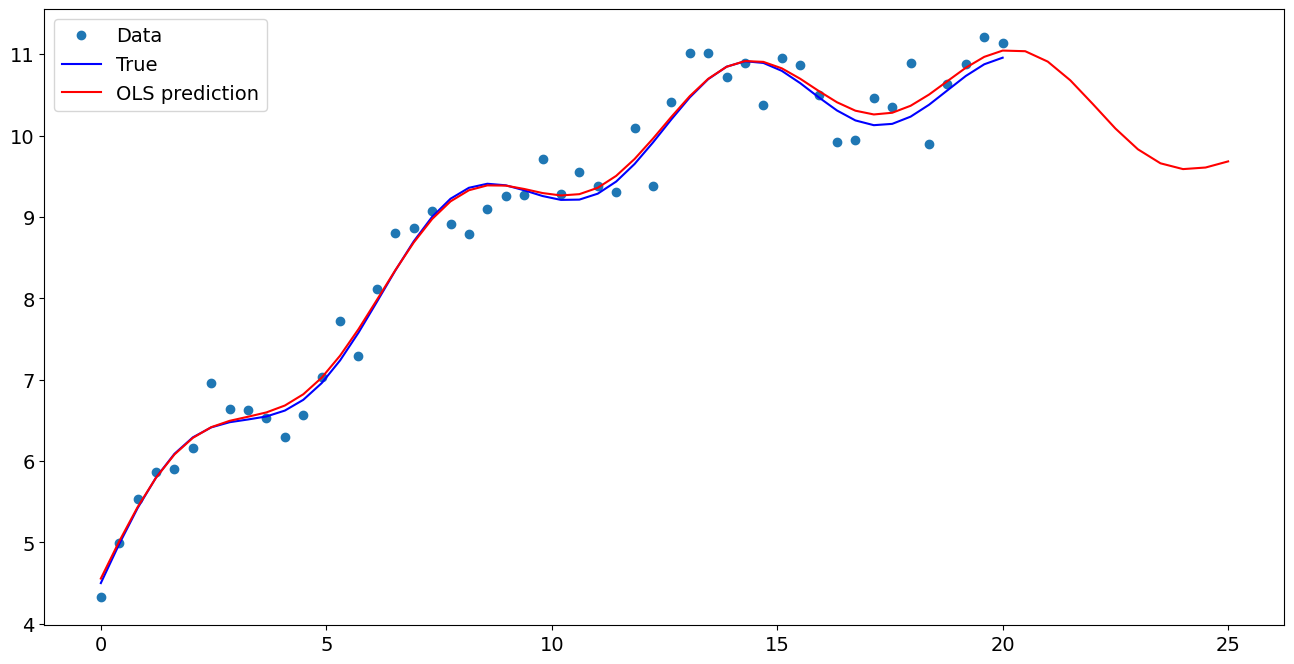

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.037415
x1                  0.496409
np.sin(x1)          0.452074
I((x1 - 5) ** 2)   -0.019264
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.036192
1    10.908574
2    10.678719
3    10.387030
4    10.086688
5     9.830637
6     9.658615
7     9.587433
8     9.606851
9     9.682090
dtype: float64